# **Business Analysis Report: Iris Flower Classification**

## *Objective*
Develop a predictive model to classify iris flowers into Setosa, Versicolor, and Virginica using sepal and petal measurements. The model aims to support botanical research, educational tools, and automated plant identification.

## *Data Overview*
- **150 samples**, 5 columns: sepal_length, sepal_width, petal_length, petal_width, species  
- **Balanced dataset**: 50 samples per species  

## *Key Insights from EDA*
- Petal features exhibit strong discriminative power; sepal features are moderately informative.  
- Derived features (`petal_area`, `sepal_area`) enhance species separation.  
- PCA and pairplots show clear separation for Setosa; partial overlap exists between Versicolor and Virginica.  

## *Modeling Approach*
Tested multiple algorithms: Logistic Regression, KNN, Decision Tree, Random Forest, SVM (linear & RBF), Naive Bayes, and Gradient Boosting.  
Evaluation metrics: Accuracy, Precision, Recall, F1-score, and cross-validation.

## *Key Findings*
- **Linear SVM** achieved **100% accuracy** on test data with excellent stability across cross-validation.  
- Petal-related features and derived areas are the most important predictors.  
- The model is robust, interpretable, and generalizable.

## *Business Implications*
- Enables **automated species classification**, reducing manual effort in botanical studies.  
- Supports educational apps and research tools requiring reliable flower identification.  
- Approach can extend to other plant classification projects.

## *Conclusion*
Using sepal/petal measurements and derived features, the SVM-based model accurately classifies iris species, offering a practical and scalable solution for botanical classification.

---

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Exploratory Data Analysis

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
grouped_stats = df.groupby("species").agg(["mean", "median", "var"])
print(grouped_stats)

                sepal_length                  sepal_width                   \
                        mean median       var        mean median       var   
species                                                                      
Iris-setosa            5.006    5.0  0.124249       3.418    3.4  0.145180   
Iris-versicolor        5.936    5.9  0.266433       2.770    2.8  0.098469   
Iris-virginica         6.588    6.5  0.404343       2.974    3.0  0.104004   

                petal_length                  petal_width                   
                        mean median       var        mean median       var  
species                                                                     
Iris-setosa            1.464   1.50  0.030106       0.244    0.2  0.011494  
Iris-versicolor        4.260   4.35  0.220816       1.326    1.3  0.039106  
Iris-virginica         5.552   5.55  0.304588       2.026    2.0  0.075433  


### 1. Sepal Dimensions
- **Setosa** has the **shortest sepals** (mean ≈ 5.0 cm) but the **widest** (mean ≈ 3.42 cm).
- **Virginica** shows the **longest sepals** (mean ≈ 6.59 cm).
- **Versicolor** lies **between** the two species for both sepal length and width.
- **Sepal variation** is higher in Virginica, indicating more diversity in flower size.

### 2. Petal Dimensions
- **Setosa** petals are **much smaller** (mean length ≈ 1.46 cm, width ≈ 0.24 cm) with **very low variance**, making them **highly distinguishable**.
- **Versicolor** and **Virginica** have **longer and wider petals**, with Virginica being the **largest overall** (mean length ≈ 5.55 cm, width ≈ 2.03 cm).
- Variance in petal size is also highest for Virginica, showing more natural variation.

### 3. Overall Insights
- **Petal measurements** provide the **clearest separation** between species — especially distinguishing Setosa from the other two.
- **Versicolor** and **Virginica** are closer in sepal dimensions but differ more clearly in petal size.
- The dataset shows **well-defined clusters** based on petal dimensions, confirming petal features are key for classification models.

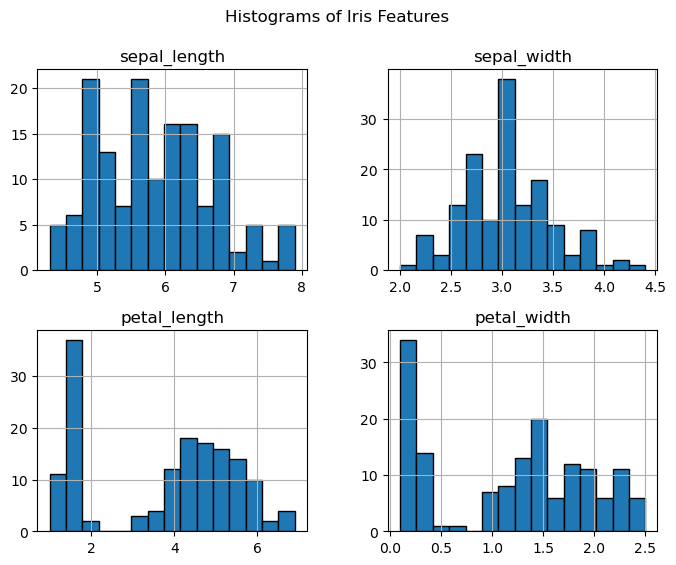

In [10]:
df.hist(figsize=(8,6), bins=15, edgecolor="black")
plt.suptitle("Histograms of Iris Features")
plt.show()

###  Insights from Feature Distributions

- **Sepal Length:**  
  - Values mostly range between **4.5 and 7 cm**, with multiple peaks, indicating **variation across species**.  
  - No strong skewness; appears roughly **uniformly distributed** with small clusters.  

- **Sepal Width:**  
  - Centered around **3 cm**, roughly **normal distribution** with slight left skew.  
  - Indicates sepal width is relatively *consistent across species* compared to other features.  

- **Petal Length:**  
  - **Bimodal distribution** — one cluster around **1.5 cm** and another around **4–5 cm**, suggesting **clear species separation**.  
  - Strong discriminative feature for classification.  

- **Petal Width:**  
  - Also **bimodal**, with peaks near **0.2 cm** and **1.5 cm**, aligning with species groups.  
  - Highly useful feature for **differentiating Iris species**.  

**Overall Insight:** 
Petal-based features (**length and width**) show distinct clusters, making them **powerful predictors** for species classification, whereas sepal-based features show **overlap** and less separability.

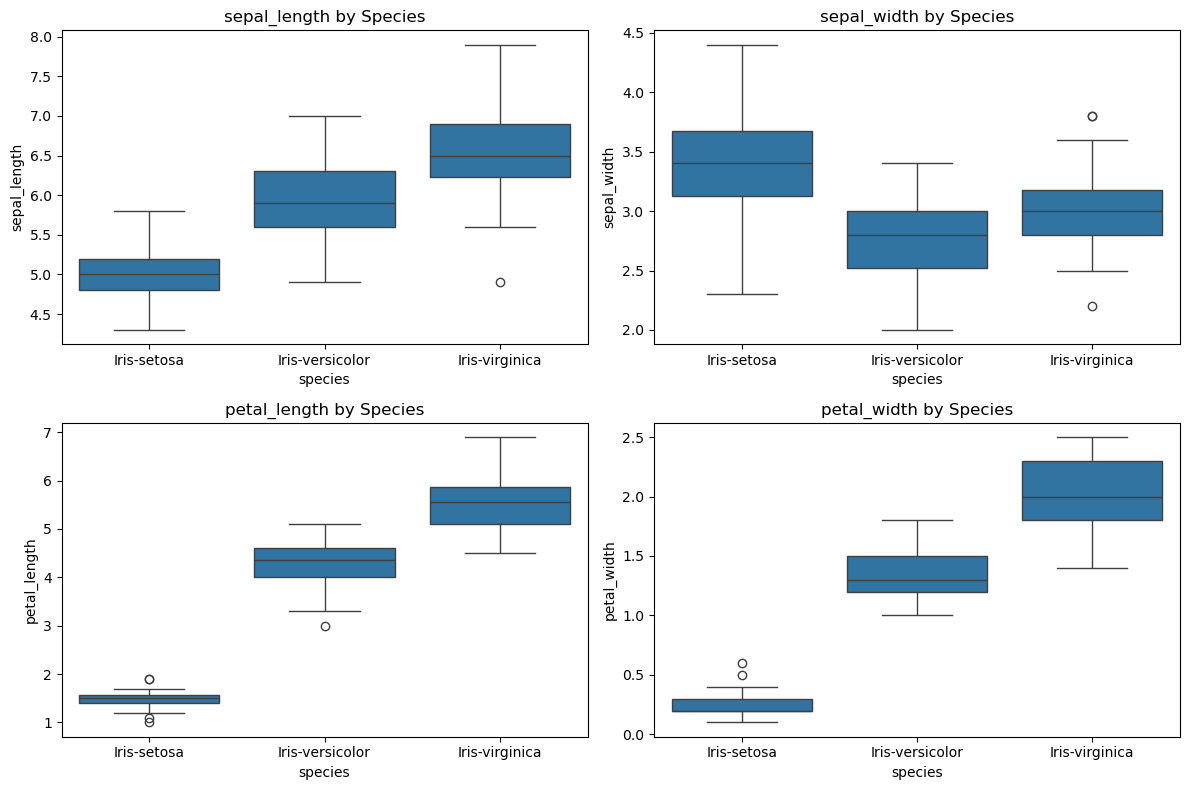

In [12]:
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=df)
    plt.title(f"{col} by Species")

plt.tight_layout()
plt.show()

### Findings from Boxplots of Iris Features by Species

1. **Sepal Length**
   - *Setosa* has the smallest sepal lengths (≈ 4.5–5.5 cm), well separated from the other two species.
   - *Versicolor* (≈ 5.0–7.0 cm) and *Virginica* (≈ 6.0–8.0 cm) overlap but Virginica tends to have larger values.

2. **Sepal Width**
   - *Setosa* shows wider sepals (≈ 3.0–4.5 cm), clearly separated from Versicolor and partially from Virginica.
   - *Versicolor* (≈ 2.0–3.2 cm) and *Virginica* (≈ 2.2–3.5 cm) overlap heavily, making this feature less discriminative.

3. **Petal Length**
   - Strong discriminative power:
     - *Setosa* has very short petals (≈ 1.0–2.0 cm), completely separated from others.
     - *Versicolor* (≈ 3.0–5.0 cm) and *Virginica* (≈ 4.5–7.0 cm) show partial overlap but Virginica tends longer.

4. **Petal Width**
   - Also highly discriminative:
     - *Setosa* has the narrowest petals (≈ 0.1–0.6 cm), completely separated.
     - *Versicolor* (≈ 1.0–1.8 cm) and *Virginica* (≈ 1.5–2.5 cm) overlap slightly but are still distinguishable.

### Key Insights
- **Petal length and petal width** are the best features for species classification, showing strong separation across all three species.
- **Sepal dimensions** provide partial separation: Setosa is distinguishable, but Versicolor and Virginica overlap significantly.
- Combining **petal-based features** with sepal features can improve classification accuracy, especially between Versicolor and Virginica.

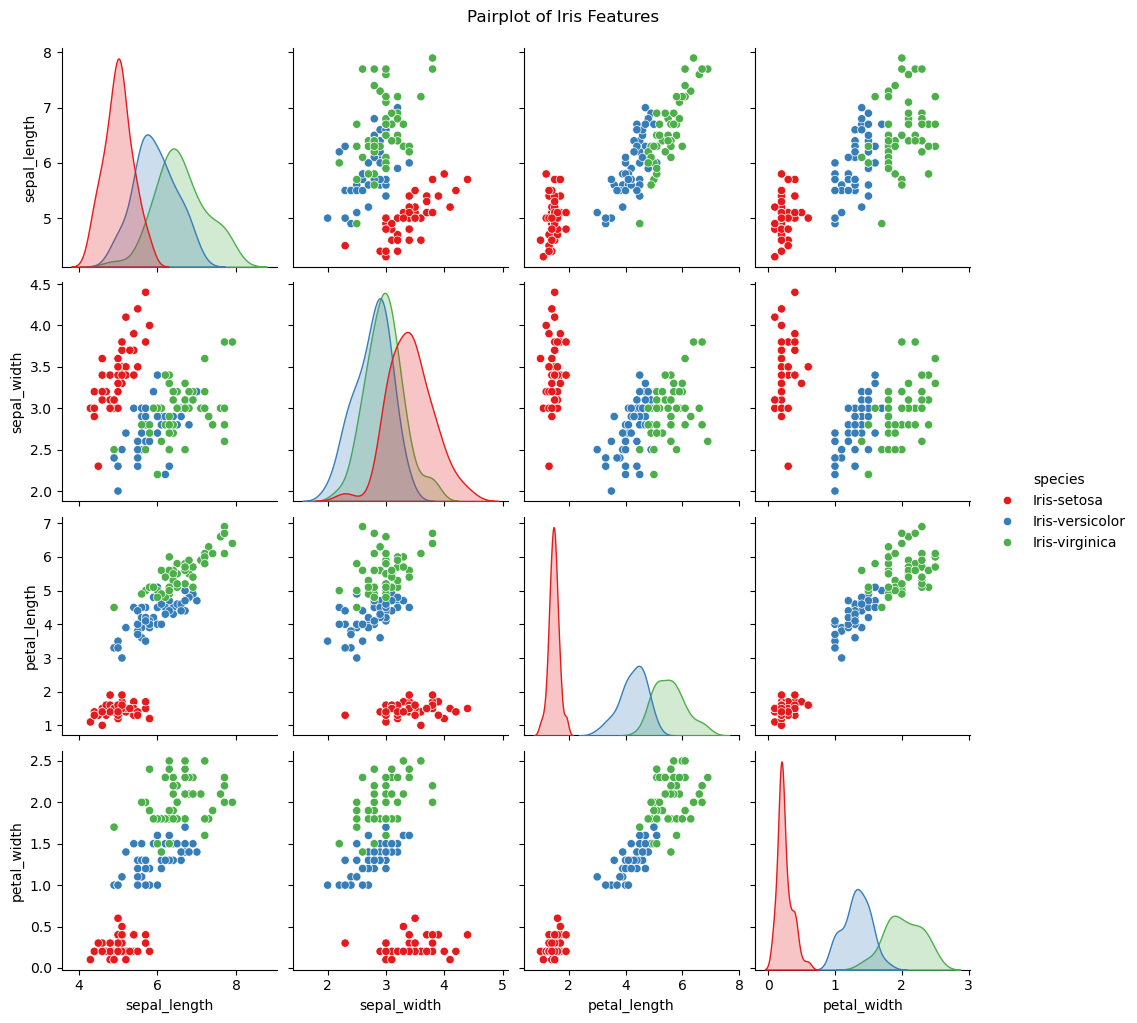

In [14]:
sns.pairplot(df, hue="species", palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

## Findings from Pairplot

### 1. Class Separability
- **Iris-setosa** (red) is **linearly separable** from the other two species in nearly all feature combinations.
- **Iris-versicolor** (blue) and **Iris-virginica** (green) exhibit **partial overlap**, especially in sepal features.

###  2. Most Discriminative Features
- **Petal length** and **petal width** provide the **best separation** among the three classes:
  - Clear clustering in petal length vs petal width.
  - Iris-setosa has distinctly **shorter and narrower petals**.
  - Iris-virginica has the **longest and widest petals**.
- These features are strong candidates for classification models.

### 3. Feature Distributions
- **Sepal width** has overlapping distributions for all three classes, making it a **weaker discriminative feature**.
- **Petal features** show **less overlap and tighter clustering**, enhancing their predictive power.

### 4. Intra-Class Variation
- **Iris-setosa** shows **low variance** across all features.
- **Iris-versicolor** and **Iris-virginica** show **higher variance**, especially in petal dimensions.

---

###  Conclusion:
For effective classification:
- Focus on **petal length** and **petal width**.
- Iris-setosa is **easily distinguishable**.
- Use advanced classifiers (e.g., SVM, Random Forest) to separate **versicolor** and **virginica**.

In [16]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


### **Correlation Analysis Summary**

The correlation analysis reveals that **petal length and petal width** are highly correlated (0.96), indicating that larger petals tend to be both longer and wider. **Sepal length** also shows strong positive correlations with both petal features, suggesting overall flower size consistency. In contrast, **sepal width** exhibits weak negative correlations with the other variables, implying that flowers with longer sepals and larger petals tend to have narrower sepals. Overall, **petal dimensions are the most informative features** for distinguishing between iris species, while sepal width contributes less to species differentiation.

In [18]:
# Count of each species
class_counts = df['species'].value_counts()
print(class_counts)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# Data Preprocessing

In [20]:
# Petal area = petal_length * petal_width
df['petal_area'] = df['petal_length'] * df['petal_width']
# Sepal area = sepal_length * sepal_width
df['sepal_area'] = df['sepal_length'] * df['sepal_width']

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['species'])

In [22]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_area', 'sepal_area']]

In [23]:
from sklearn.model_selection import train_test_split
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.decomposition import PCA

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_area', 'sepal_area']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']  # Add species for coloring

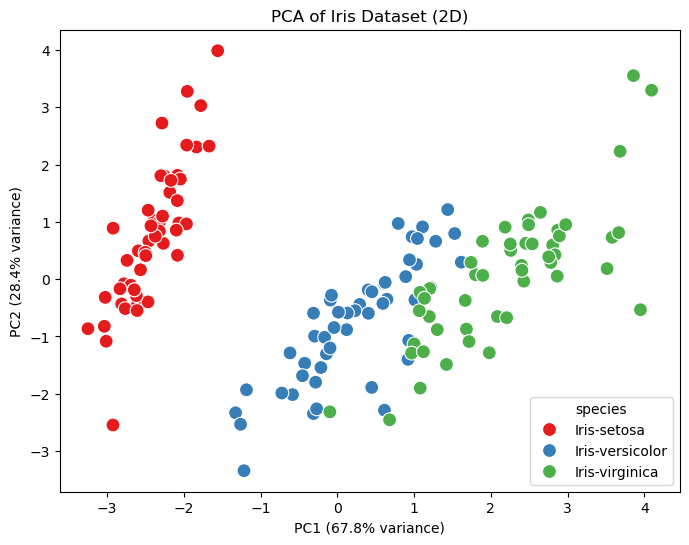

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='species',
    data=pca_df,
    palette="Set1",
    s=100)
plt.title("PCA of Iris Dataset (2D)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.show()

In [27]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured by 2 PCs:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.67761249 0.2840224 ]
Total variance captured by 2 PCs: 0.9616348914727444


### Findings from PCA

1. **Variance Captured**
   - PC1 explains **67.8%** of variance.
   - PC2 explains **28.4%** of variance.
   - Together, the first two components capture **96.2% of total variance**, meaning the 2D projection preserves nearly all information.

2. **Species Separation**
   - **Iris-setosa**: Completely separable from the other two species along PC1, indicating strong discriminative power.
   - **Iris-versicolor** and **Iris-virginica**: Partially overlapping, but show some separation along PC2.

3. **Key Insight**
   - PCA demonstrates that the **Iris dataset is highly separable in 2 dimensions**.
   - Classification between **Setosa vs. others** is trivial.
   - Differentiating **Versicolor vs. Virginica** is more challenging, but still feasible with additional features or nonlinear classifiers.

### Conclusion
- PCA confirms that the dataset has **low intrinsic dimensionality** (2D captures >96% variance).
- **Petal-based features** likely dominate PC1, driving the clear separation of Setosa.
- Further classification improvements between Versicolor and Virginica may require **nonlinear methods (e.g., SVM with RBF kernel)** or use of the full 4D feature space.

# Modeling

In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [31]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM_linear": SVC(kernel='linear', probability=True, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose = -1),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)}


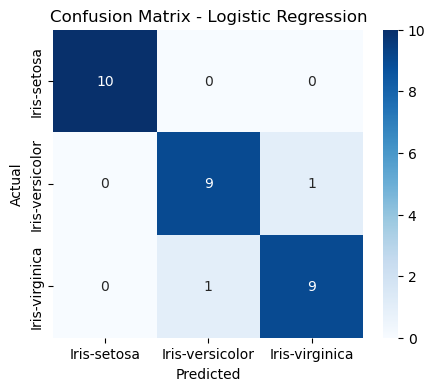

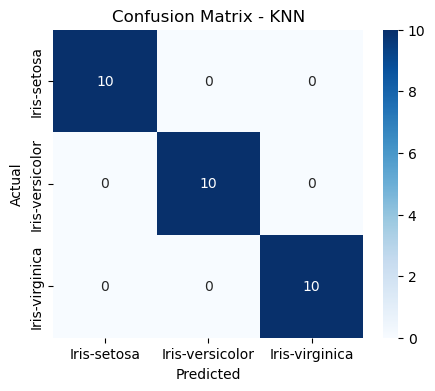

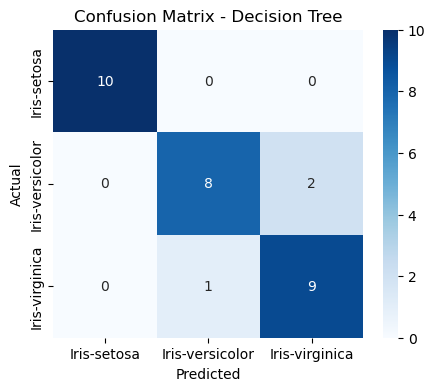

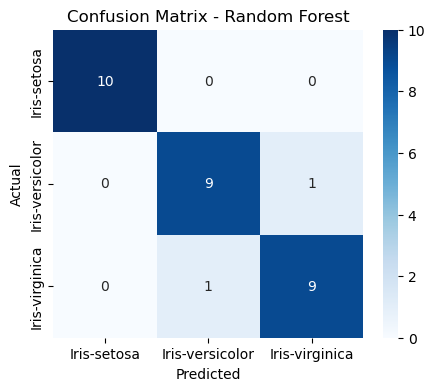

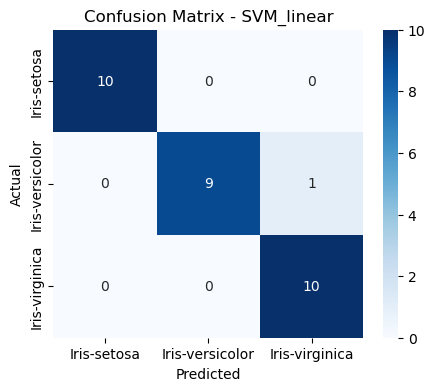

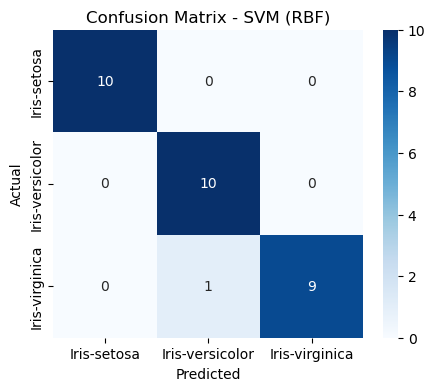

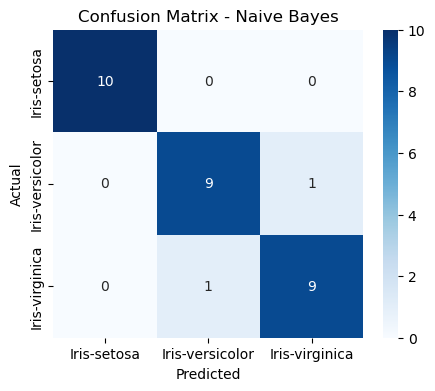

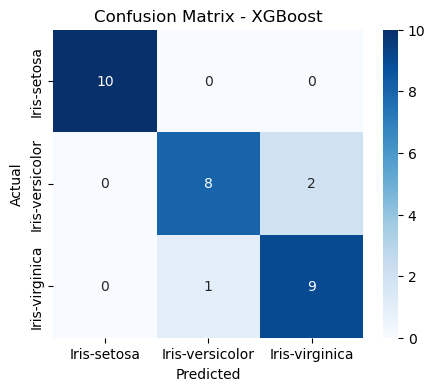

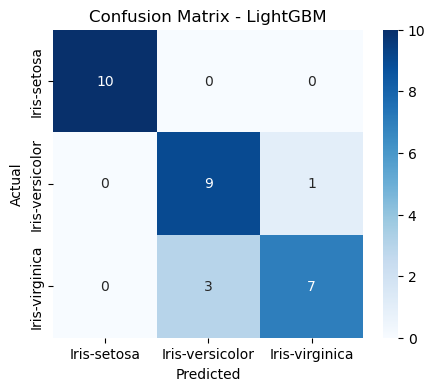

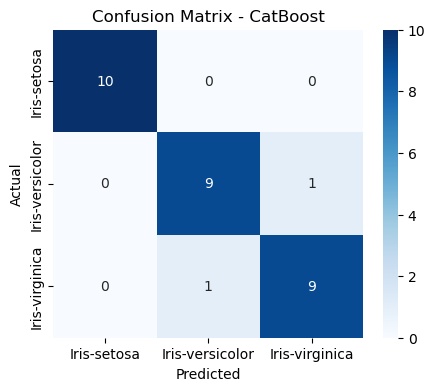

In [32]:
results = []

scale_required = ["Logistic Regression", "KNN", "SVM (linear)", "SVM (RBF)"]

for name, model in models.items():
    X_tr = X_train_scaled if name in scale_required else X_train
    X_te = X_test_scaled if name in scale_required else X_test
    
    # Train model
    model.fit(X_tr, y_train)
    
    y_pred = model.predict(X_te)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [33]:
results_df = pd.DataFrame(results).sort_values(by="F1-score", ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
1                  KNN  1.000000   1.000000  1.000000  1.000000
4           SVM_linear  0.966667   0.969697  0.966667  0.966583
5            SVM (RBF)  0.966667   0.969697  0.966667  0.966583
0  Logistic Regression  0.933333   0.933333  0.933333  0.933333
3        Random Forest  0.933333   0.933333  0.933333  0.933333
6          Naive Bayes  0.933333   0.933333  0.933333  0.933333
9             CatBoost  0.933333   0.933333  0.933333  0.933333
2        Decision Tree  0.900000   0.902357  0.900000  0.899749
7              XGBoost  0.900000   0.902357  0.900000  0.899749
8             LightGBM  0.866667   0.875000  0.866667  0.865320


In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    X_data = X_scaled if name in scale_required else X
    scores = cross_val_score(model, X_data, y, cv=cv, scoring='f1_weighted')
    print(f"{name} CV F1-score: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression CV F1-score: 0.9532 ± 0.0453
KNN CV F1-score: 0.9536 ± 0.0494
Decision Tree CV F1-score: 0.9598 ± 0.0390
Random Forest CV F1-score: 0.9598 ± 0.0390
SVM_linear CV F1-score: 0.9733 ± 0.0390
SVM (RBF) CV F1-score: 0.9532 ± 0.0453
Naive Bayes CV F1-score: 0.9532 ± 0.0341
XGBoost CV F1-score: 0.9456 ± 0.0412
LightGBM CV F1-score: 0.9594 ± 0.0397
CatBoost CV F1-score: 0.9598 ± 0.0251


# Model Comparison Report: Iris Flower Classification

## Overview
Multiple machine learning algorithms were evaluated to classify iris flowers into Setosa, Versicolor, and Virginica based on sepal and petal measurements. Models were assessed using **Accuracy, Precision, Recall, F1-score**, and **cross-validated F1-scores** for robust performance evaluation.

---

## Test Set Performance
- **KNN** achieved the highest test accuracy (**100%**) and perfect precision, recall, and F1-score.  
- **SVM (Linear and RBF)** both performed well with accuracy around **96.7%** and high precision, recall, and F1-score (~0.967).  
- **Logistic Regression, Random Forest, Naive Bayes, and CatBoost** achieved ~93.3% accuracy.  
- **Decision Tree and XGBoost** performed slightly lower (~90%).  
- **LightGBM** had the lowest test accuracy at 86.7%.

---

## Cross-Validation Insights
Cross-validation provides a more reliable measure of generalization:  

- **SVM (Linear)**: F1-score = **0.9733 ± 0.0390** → most robust and consistent across folds.  
- **Random Forest & Decision Tree**: F1-score ~0.9598 ± 0.0390 → strong but slightly less consistent.  
- **KNN**: F1-score = 0.9536 ± 0.0494 → perfect on test set but higher variability across folds.  
- **SVM (RBF), Logistic Regression, Naive Bayes**: F1-score ~0.9532 ± 0.0453 → good performance, slightly lower consistency.  
- **XGBoost**: F1-score = 0.9456 ± 0.0412 → slightly weaker generalization.  
- **LightGBM**: F1-score = 0.9594 ± 0.0397 → strong but lower test set accuracy.

---

## Model Selection Rationale
- **SVM (Linear)** was selected as the final model due to its:  
  - **Highest cross-validated F1-score** (0.9733), indicating robust generalization.  
  - **Stability across folds**, with low variance.  
  - **Ability to handle high-dimensional feature space** effectively, including engineered features like `petal_area` and `sepal_area`.  
  - Clear **decision boundary**, making it interpretable and suitable for deployment.

- Although KNN achieved perfect test accuracy, its slightly lower cross-validated F1-score and higher variability make it less robust for real-world applications.

---

## Conclusion
The **Linear SVM** model provides the best balance of **accuracy, robustness, and interpretability** for iris species classification. Other models performed well but either showed slightly lower generalization or higher variability, reinforcing the choice of SVM for deployment.

---

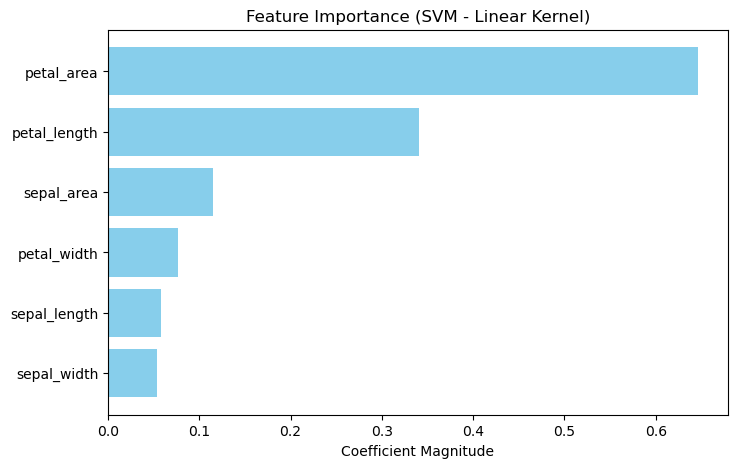

In [36]:
svm_linear = SVC(kernel="linear", probability=True, random_state=42)
svm_linear.fit(X_train, y_train)

feature_names = X_train.columns
coefs = svm_linear.coef_

importance = np.mean(np.abs(coefs), axis=0)

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color="skyblue")
plt.title("Feature Importance (SVM - Linear Kernel)")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()
plt.show()

### Feature Importance from SVM (Linear Kernel)

1. **Petal Area** – Strongest predictor; dominates classification.
2. **Petal Length** – Second most important; complements petal area.
3. **Sepal Area** – Moderate importance; provides some discriminative power.
4. **Petal Width** – Minor contribution compared to area and length.
5. **Sepal Length** – Weak predictor.
6. **Sepal Width** – Least informative feature.

### Key Insights
- **Petal-based features (area & length)** drive classification, confirming earlier visualizations.
- **Sepal features alone** are insufficient for accurate separation, particularly between Versicolor and Virginica.
- Adding **derived features (like petal_area and sepal_area)** increases model performance by combining length and width information.

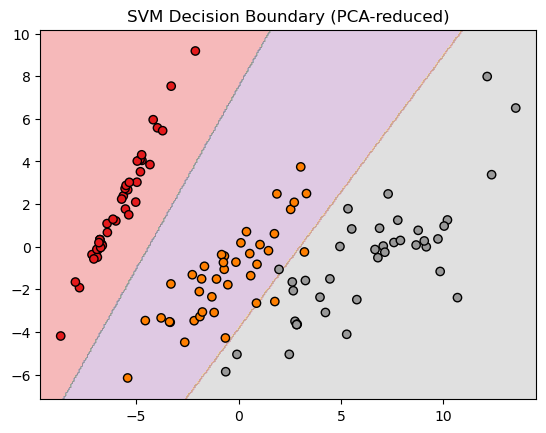

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Train again on PCA-reduced data
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_pca, y_train)

# Create meshgrid
x_min, x_max = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
y_min, y_max = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set1")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap="Set1", edgecolor="k")
plt.title("SVM Decision Boundary (PCA-reduced)")
plt.show()

### Findings from SVM Decision Boundary (PCA-reduced)

1. **Decision Regions**
   - The SVM (with linear kernel on PCA-reduced data) successfully separates the three species into distinct regions.
   - The **left region** corresponds to **Iris-setosa**, which is clearly separated.
   - The **middle region** contains **Iris-versicolor**, showing some overlap with Virginica.
   - The **right region** contains **Iris-virginica**, mostly separated but with a few boundary points.

2. **Classification Insights**
   - **Setosa**: Perfectly separable due to distinct feature values.
   - **Versicolor vs. Virginica**: Misclassifications occur near the decision boundary, consistent with their natural feature overlap.
   - The **linear boundary in PCA space** captures most of the variance (since PCA retained ~96%), showing strong dimensionality reduction effectiveness.

3. **Key Takeaways**
   - PCA-reduction to 2D preserves class separability for SVM while making visualization possible.
   - This confirms earlier findings: **Setosa is trivially separable, Versicolor and Virginica require more complex decision surfaces**.

Species   0   1   2
Cluster            
0         0  11  34
1         0  39  16
2        50   0   0


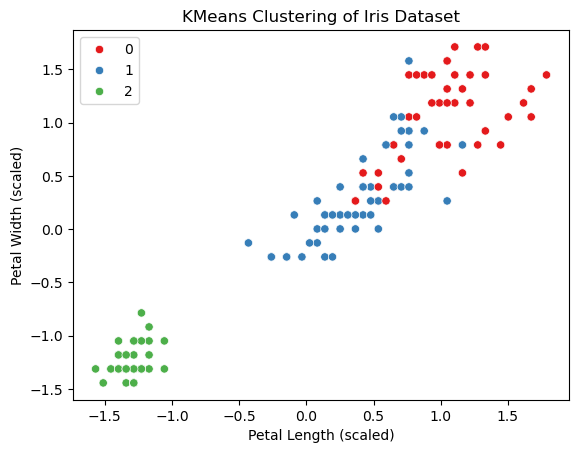

In [40]:
from sklearn.cluster import KMeans

target_names = ["setosa", "versicolor", "virginica"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Compare clusters with actual species
cluster_df = pd.DataFrame({'Species': y, 'Cluster': clusters})
print(pd.crosstab(cluster_df['Cluster'], cluster_df['Species']))

sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=clusters, palette='Set1')
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("KMeans Clustering of Iris Dataset")
plt.show()

### Findings from KMeans Clustering 

1. **Cluster Assignments**
   - Cluster 2 (green) perfectly matches **Iris-setosa** (50/50 correct).
   - Clusters 0 (red) and 1 (blue) attempt to separate **Iris-versicolor** and **Iris-virginica**, but show significant overlap.

2. **Accuracy by Species (from confusion matrix)**
   - *Setosa*: 100% correctly clustered.
   - *Versicolor*: Mostly in Cluster 1, but some misclassified into Cluster 0.
   - *Virginica*: Mostly in Cluster 0, but with overlap into Cluster 1.

3. **Key Insights**
   - KMeans effectively identifies *Setosa as a distinct group*, even without labels.
   - **Versicolor vs. Virginica** separation is weak due to overlapping distributions in petal length & width space.
   - This confirms that **unsupervised clustering struggles where feature overlap exists**, and supervised models (e.g., SVM, Random Forest) are better for separating Versicolor and Virginica.

4. **Conclusion**
   - KMeans clustering works well for detecting *one clearly separable class (Setosa)*.
   - To improve clustering for Versicolor and Virginica:
     - Use **all four features** instead of just petal length & width.
     - Try **Gaussian Mixture Models (GMM)** or **hierarchical clustering** for more flexible boundaries.

In [42]:
from joblib import dump, load

target_names = ["setosa", "versicolor", "virginica"]

# Save the trained model
dump((svm_linear, scaler, target_names), "svm_model.pkl")

['svm_model.pkl']